**Contrastive Learning and Transfer Learning for Images**
- What is Transfer Learning - Why do we need it?
- Types of Transfer Learning
- Supervised and Self-Supervised Learning
- What is Contrastive Learning?


**What is Transfer Learning - Why do we need it?**

There are so many images in large datasets like ImageNet, with 14 Million labeled images to train our models on.

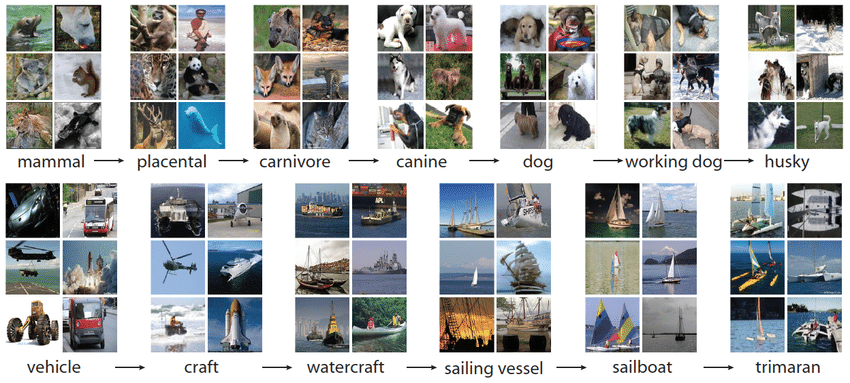

We want to build models that leverage all this data we have to guide understanding of images, or other date types

However, a lot of times the tasks we actually care about are not the ones in the datasets, such as labeling "Is this an image of a sailboat?". More often, we want to identify where in an image are specific objects, answer human language quesitons about images, find similar images, or track objects in videos

One of my first Machine Learning projects was to track and count unique cars, pedestrians, strollers and bikes in traffic cameras for a city. This has been one of my favorite example problems for modeling image data because the task itself is so complicated, handling a lot of details that we won't go into here such as occlusion, 
"Did that object just disappear in the middle of the image, or did it move over?"
"Is this pedestrian the same one as the one I just lost track of?" 

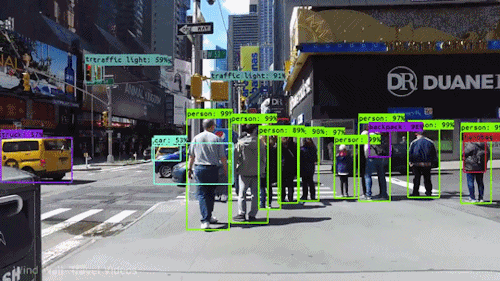

Let's pretend build an object tracking model. We have a dataset of labled videos, with bounding boxes for each frame of the video about which of the objects we care about are in the box. That takes a lot of human effort to label a single video clip! With ML automation (an already built object tracking model) we can make the labeler's job MUCH easier, but ignoring that we are taking about unbelievable frame by frame effort.

Even with model support, tracking databases are going to be tiny, with thousands of labeled video sequences each full of substantial rich content.

We train our model on may tasks, such as identifying the objects in the image, and recognizing their re-appearance correctly. There are a lot of details that we won't cover here but the main thing we need to emphasize is we don't have enough data! So how can we add more easily accessible data?

- Images of the objects we care about (Maybe we can find some images of the objects we care about, and this can help, but what if that is still too small because it is task specific?
- Images of any objects. This brings us back to datasets like ImageNet with 10s of millions of datasts, especially if we aggregate multiple datasets.

**Issue: Computation**

Training a model on 10s of millions of objects is a lot of compute! What we want is to regularize our tracking model by forcing it to also be capable of modeling the larger dataset. That way we have a much smaller search space and are not at risk at overfitting, although to be honest underfitting is the real issue we will run into that we can demonstrate later.

So using this other dataset to regularize our model would require concurrently modeling both datasets, and require a massive amount of compute due to fitting to the massive dataset.

So how can we model our dataset while maintaining the advantages from the dataset?

**Introducing: Transfer Learning. Options and Ideas**

What if someone else would just train a single massive model on the massive datasets like ImageNet, could the whole community share that model to somehow train on our smaller datasets while leveraging the larger dataset?

Google and other tech companies have built and published models such as Inception, that we can pull and leverage in our models. But how do we leverage it?

There are a lot of options depending on the amount of code we want to write and the amount of compute we perform.

The core idea is to chop off the last prediction layer, or maybe many final layers of the pre-trained model. The task-specific model then creates a new set of final layers to train on their task, sometimes treating the output of the middle layers of the pre-trained model as features into the new "model", or final trainable layers. Imagine any of the nodes near the right as the final layer, and replacing those layers to fine-tune our model, either replaced with similar layers or with a whole other architecture.


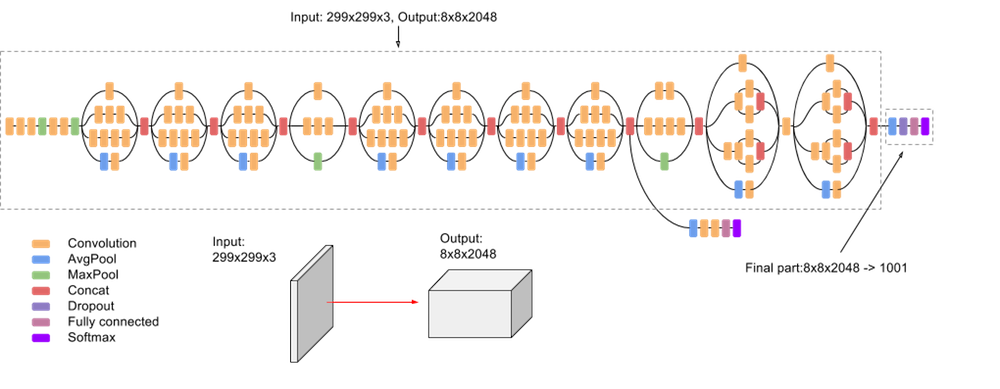

1- Lowest compute, lowest code. We freeze the base layers of the pre-trained model and only train our newly replaced layers.

2- Low compute, lowest code. We train our final layers, and also fine-tune, or allow the model to continue to edit and train the base layers. Same as 1- but we allow the base layers to train, so adding a bit of compute, and relying more heavily on early stopping

3- Highest Compute, medium code. We simulataneously train our model on the task at hand, and train the model on the initial base task. So in code, we would route the output into two final layers, one layer for the base task, with the full base model, and another output for our task. Therefore, we will train on our task without the possibility of forgetting how to do the original task. The issue is, again, we're addressing the original dataset and often need massive compute. 

4- Medium compute, highest code, most common. Bounded fine-tuning. You still re-initialize or redefine your final model layers, and fine-tune your early layers, but you bound the deviation in the fine-tuned layers from the base model.

4A- You accomplish this bounding via a regularization parameter. Like L2 regularization, you apply a L2 penalty in the models deviation from the base model.

4B- You apply a hypersphere around the base model parameters, and constrain the learned parameters to stay within that hypersphere. So for instance, the new parameters cannot vary more than Epsilon from the base model, either measured via manhattan distance like a hypercube or euclidian distance like a hypersphere.

**Self-Supervised Learning**

Self-Supervised Learning is a way to use a massive dataset without labels. This is often most useful when you have multimedia datasets, such as having instances of text, audio, video, questions and answers. Sometimes you have a video uploaded from the user with audio, a question in text, and you want to derive an answer, you need to be able to model datasets that have these types of input data. 


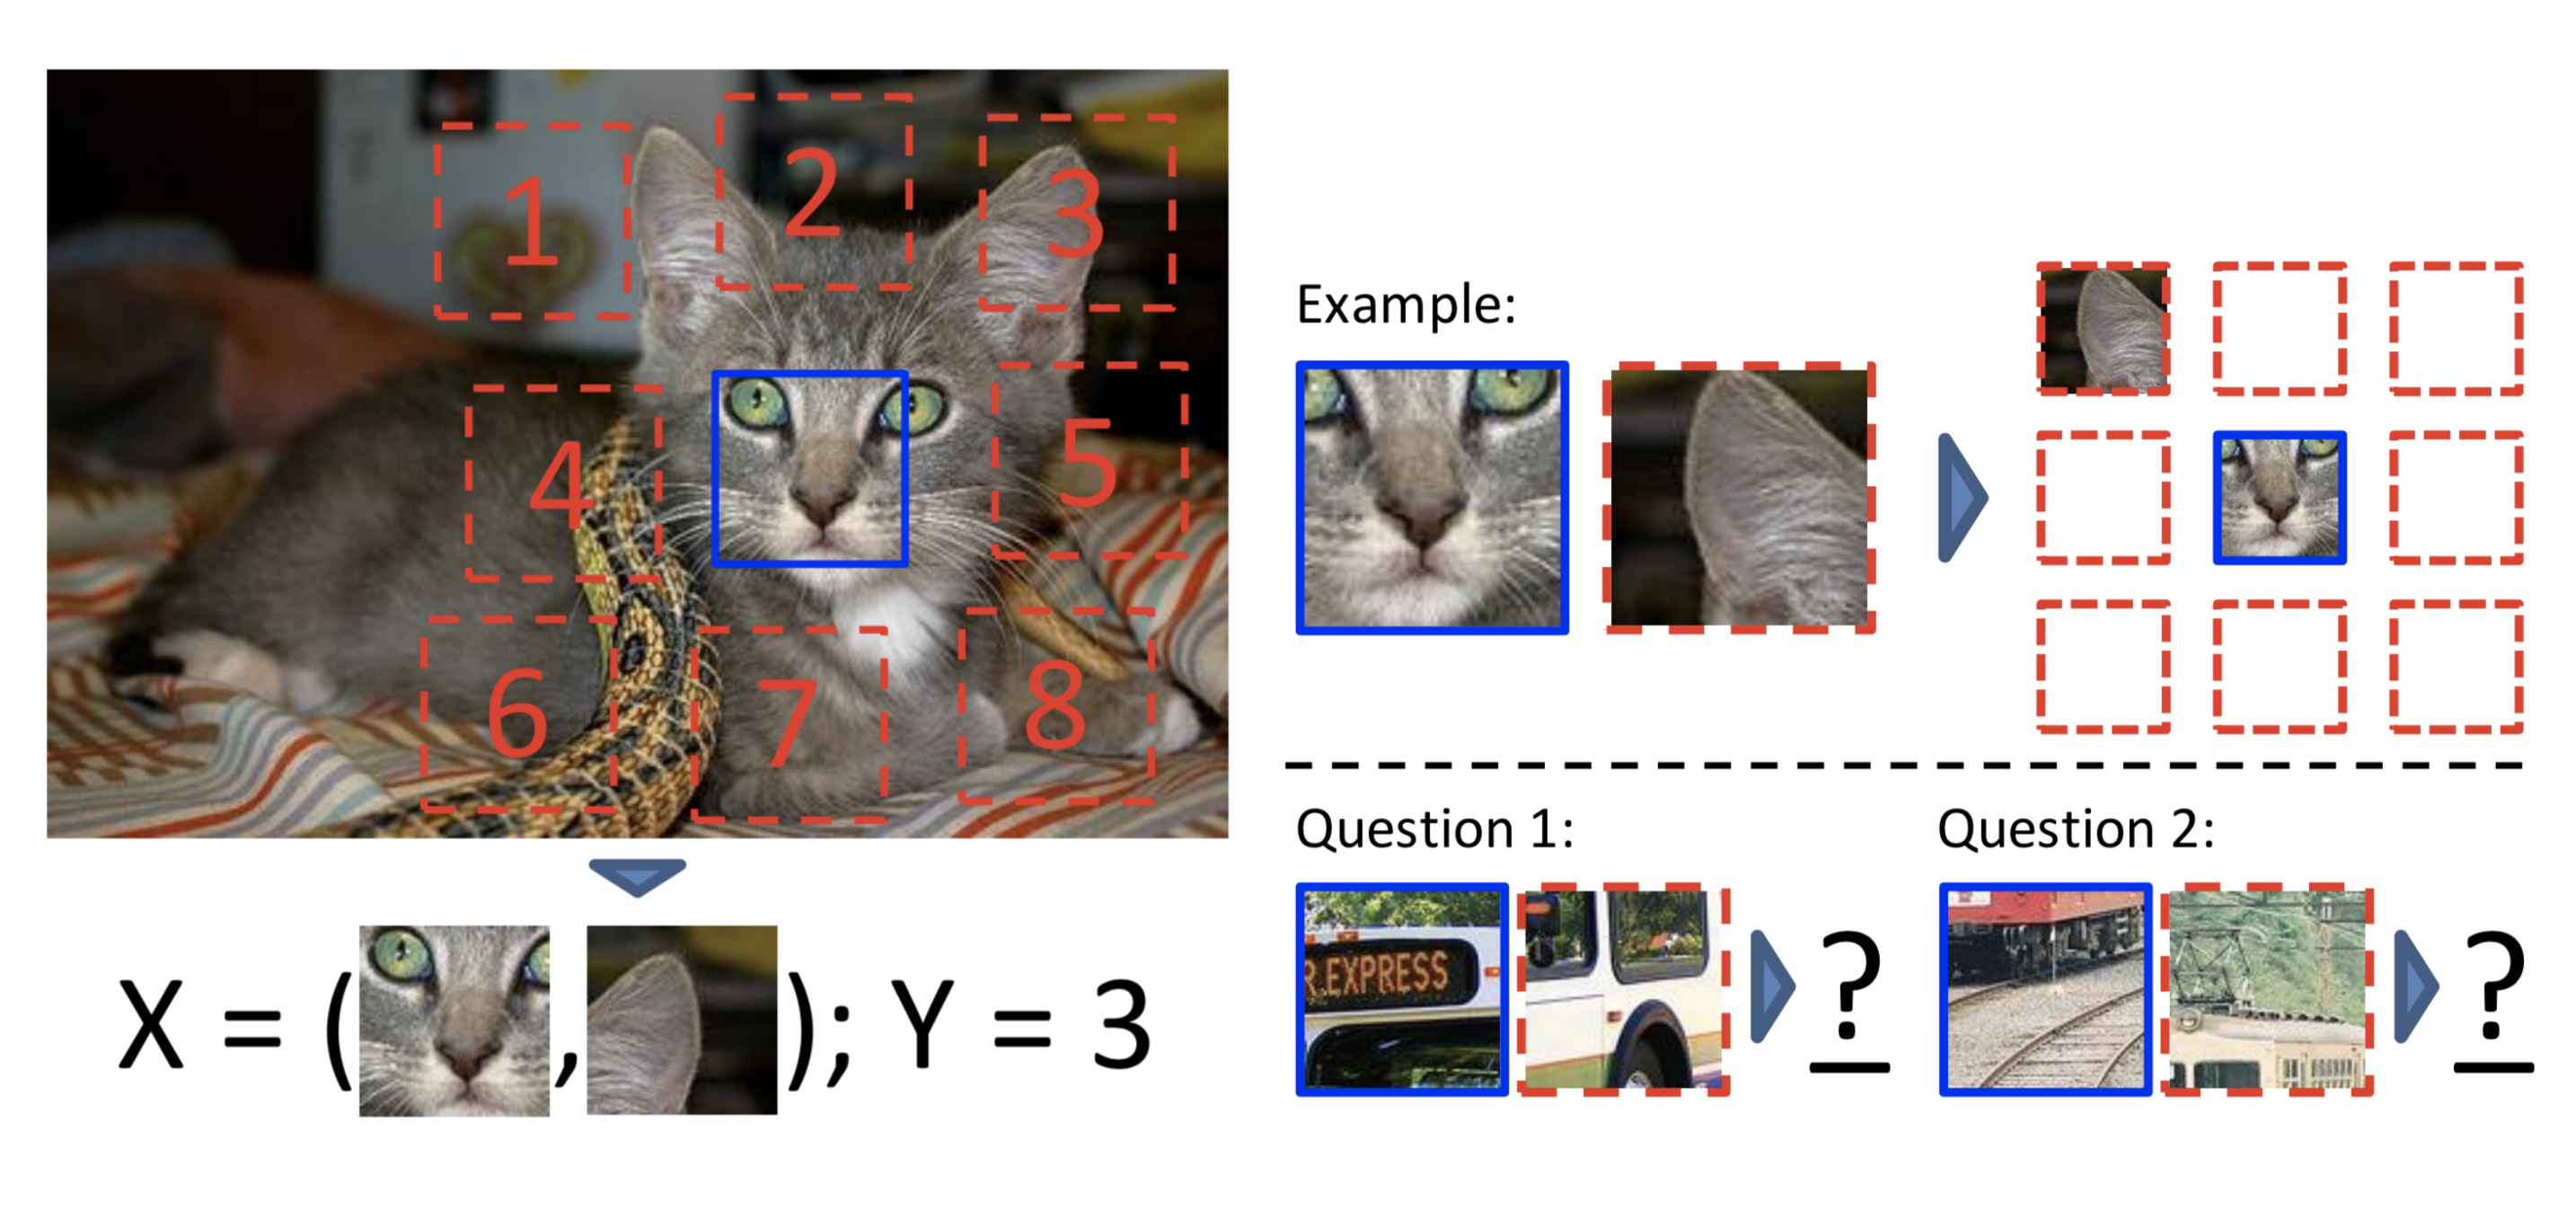



The issue is, you don't always have the same types of data for each input. So the point of self-supervised learning is to be able to learn a generic function that is able to learn from a diverse set of data, and can learn a meaningful model on any set of the available input data. Here is a video of Yann lecun describing it to learn in greater detail: https://www.youtube.com/watch?v=8TTK-Dd0H9U



Self-Supervised Learning also can be applied to learning our latent space from our single image media, and can also let us leverage our even larger unlabeled datasets, such as all images on facebook or google images. So what if we just had a massive dataset of images with no labels, could we make a cat detector?

Through self-supervised learning, we set up the model as a predictive task to predict regions of masked, or hidden areas of images. The model sees most of an image, and then it fills in the gaps it can't see. Through this, the model learns about images as a whole. We then cluster on the learned latent space of this model to make visualizations of what the model has learn, or fine-tune this model on a downstream task like image classification.
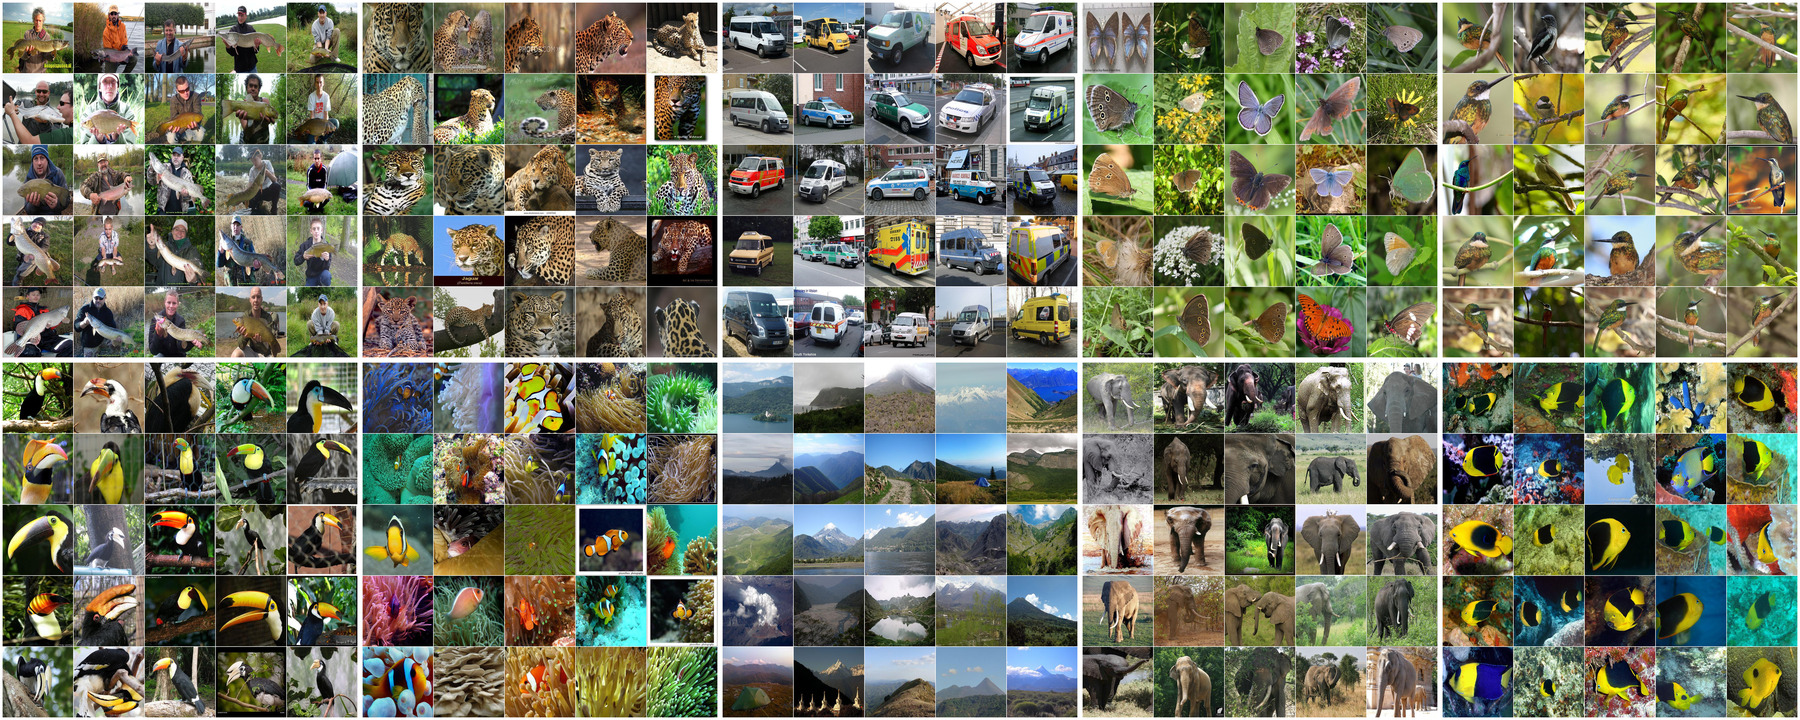

**Contrastive Self-Supervised Learning**

Contrastive learning is about learning the relationship between two datapoints, rather than modeling a single datapoint.

In the self-supervised learning sense, imagine you are building a conv net to solve an image based problem. Well one common think you might do is rotate/scale/distort the image during training so that the model can see a much larger distribution of input images. You could also mask part of the images, such as we did in self-supervised learning.

What contrastive learning does with regards to SSL, is that our loss function is a question such as "are these two the same image". So you might mask different parts of the image, maybe even the majority of the image so that there is no overlap between the two different masks, and then ask the model if the two images are the same. Therefore, the model must learn to pick up on much more high level concepts like the lighting, scenary, colorscheme, objects, and maybe even things like the direction that people in the image are looking to determine if the two segments come from the same image.

Contrastive leanring lets us use unlabeled data to train a self-supervised learning model that has a much richer understanding of the content of the dataset, especially based on information-rich data like images, video, audio, etc.

We can also use contrastive learning on supervised or self-supervised models to learn if two images share object class, such as if they are both dogs. This will behave differently in the supervised vs self-supervised case.

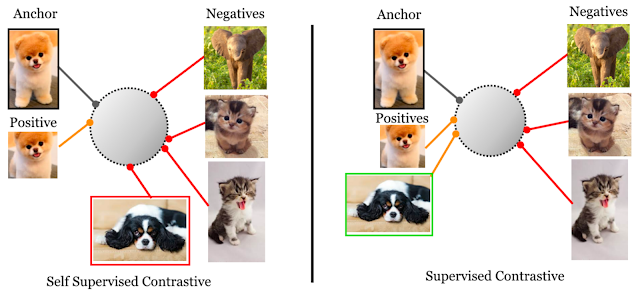

**Let's Fine-Tune a model!**

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

tf.compat.v1.disable_eager_execution()
tfph = tf.compat.v1.placeholder
tfvar = tf.compat.v1.Variable
np.random.seed(0)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
fours_and_nines = True
if fours_and_nines:
    train_keep = [y in [4, 9] and np.random.random() < .02 for y in y_train]
    test_keep = [y in [4, 9] and np.random.random() < .02 for y in y_test]
    x_train, y_train = x_train[train_keep], y_train[train_keep]
    x_test, y_test = x_test[test_keep], y_test[test_keep]

In [ ]:
for i in range(5):
    plt.imshow(x_train[i])
    plt.show()

In [ ]:
# Our x is clearly a list of 28x28 grayscale images, but y is integers instead of dummmy variables
{'x_shape': x_train.shape, 'x_max': x_train.max(), 'y_shape': y_train.shape}

In [ ]:
# Make a vector representation of our target variables
y_train_vec = pd.get_dummies(y_train).values
y_test_vec = pd.get_dummies(y_test).values

# Normalize our input data
x_test = x_test/x_train.max()
x_train = x_train / x_train.max()

# Define our inputs
xph = tfph(tf.float32, shape=(None, 28, 28))
yph = tfph(tf.int32, shape = (None, y_train_vec.shape[1]))

# Make the model
hidden = tf.expand_dims(xph, -1)
layers = []
for _ in range(3):
    hidden = tf.keras.layers.Conv2D(16, 3)(hidden)
    layers.append(hidden)
flat_hidden = tf.keras.layers.Flatten()(hidden)
layers.append(flat_hidden)

# Make our prediction
yhat = tf.keras.layers.Dense(y_train_vec.shape[1])(flat_hidden)
layers.append(yhat)
prediction = tf.math.argmax(yhat, -1)

# Loss function
celoss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    yph, yhat, axis=-1, name=None
))
opt = tf.compat.v1.train.AdamOptimizer(1e-2).minimize(celoss)

# Initialize
sess = tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())

In [ ]:
# Train and track accuracy
train_losses = []
test_acc = []
n_data = x_train.shape[0]
for i in range(1000):
    
    samples = np.random.choice(n_data, 128, replace=False)
    _, train_loss = sess.run([opt, celoss], {xph:x_train[samples], yph:y_train_vec[samples]})
    train_losses.append(train_loss)
    if i % 100 == 0:
        predictions = sess.run(prediction, {xph:x_test})
        if fours_and_nines:
            predictions = [9 if pred else 4 for pred in predictions]
        print((predictions == y_test).mean())

Now that we have a model that can either run on a large dataset or small one. Lets run it on the large dataset to build the pre-trained base model. Then we use that base model to fine-tune our task-specfiic model, pretending classification on our tiny 4's vs 9's dataset is our downstream task we care about

In [ ]:
train_keep = [y in [4, 9] and np.random.random() < .02 for y in y_train]
test_keep = [y in [4, 9] and np.random.random() < .02 for y in y_test]
x_train_small, y_train_small = x_train[train_keep], y_train[train_keep]
x_test_small, y_test_small = x_test[test_keep], y_test[test_keep]

In [ ]:
# Make a vector representation of our target variables
y_train_vec_small = pd.get_dummies(y_train_small).values
y_test_vec_small = pd.get_dummies(y_test_small).values

# Normalize our input data
x_test_small = x_test_small/x_train_small.max()
x_train_small = x_train_small / x_train_small.max()

yph_small = tfph(tf.int32, shape = (None, y_train_vec_small.shape[1]))

pretrained_base = layers[-2]

yhat_small = tf.keras.layers.Dense(y_train_vec_small.shape[1])(pretrained_base)
prediction_small = tf.math.argmax(yhat_small, -1)

# Loss function
celoss_small = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    yph_small, yhat_small, axis=-1, name=None
))
opt = tf.compat.v1.train.AdamOptimizer(1e-2).minimize(celoss + celoss_small)


uninitialized_vars = []
for var in tf.compat.v1.all_variables():
    try:
        sess.run(var)
    except tf.errors.FailedPreconditionError:
        uninitialized_vars.append(var)

init_new_vars_op = tf.compat.v1.initialize_variables(uninitialized_vars)
sess.run(init_new_vars_op)

In [ ]:
# Train and track accuracy
train_losses = []
test_acc = []
n_data = x_train.shape[0]
n_data_small = x_train_small.shape[0]
for i in range(1000):
    
    samples = np.random.choice(n_data, 128, replace=False)
    samples_small = np.random.choice(n_data_small, 32, replace=False)
    _ = sess.run([opt], {xph:x_train[samples], yph:y_train_vec[samples],
                         yph_small: np.zeros((128, 2)), yhat_small: np.ones((128, 2)) * .5})
    _ = sess.run([opt], {xph:x_train_small[samples_small], yph_small:y_train_vec_small[samples_small],
                         yph: np.zeros((32, 10)), yhat: np.ones((32, 10)) * .5})
    if i % 100 == 0:
        prediction_small = sess.run(prediction, {xph:x_test_small})
        prediction_small = [9 if pred else 4 for pred in prediction_small]
        print((prediction_small == y_test_small).mean())